In [1]:
import pandas as pd

In [2]:
import numpy as num;

import math;
import scipy.linalg as linalg;

import matplotlib.pyplot as plt;
from mpl_toolkits.mplot3d import axes3d;


In [3]:
 %matplotlib notebook

<IPython.core.display.Javascript object>


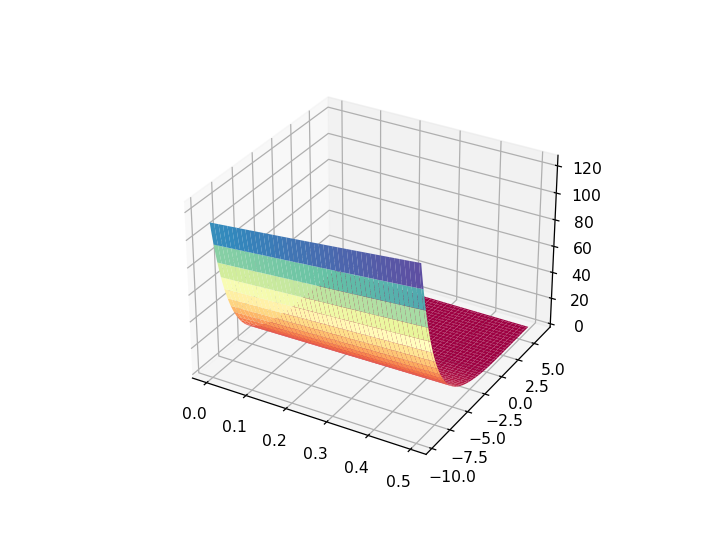

<IPython.core.display.Javascript object>


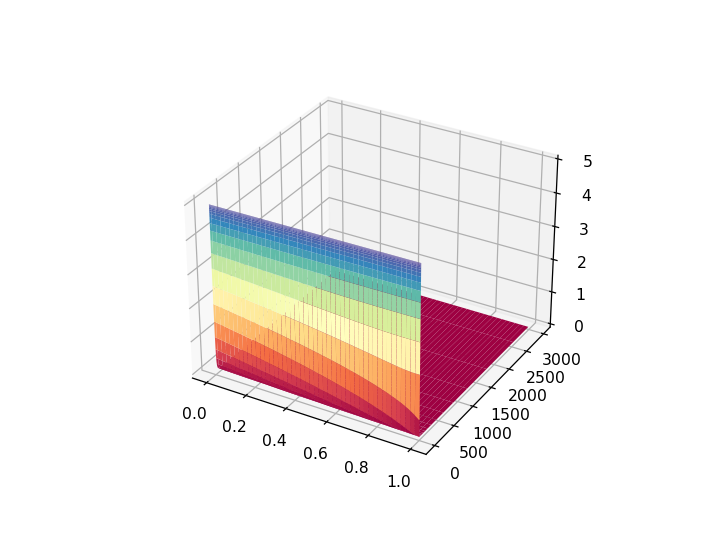

<IPython.core.display.Javascript object>


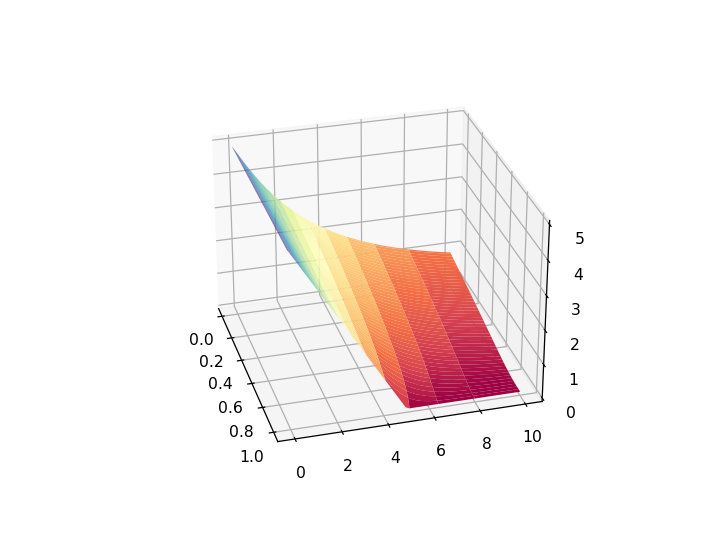

In [4]:
# Backward time central space (BTCS) scheme applied to the transformed 
# Black-Scholes equation for European options.

 #put back in for Jupyter notebook

# Step 1. Define parameters 

# Option parameters
E = 5.;                # Strike price
T = 1;                 # Expiration time
r = 0.01;               # Risk free rate
sigma = 1;            # Volatility
sLow = math.exp(-8);    # Minimum value of S (very close to boundary condition at S=0)
sHigh = math.exp(8);    # Maximum value of S (very large, since second boundary 
                        # condition for V(S,t) is defined as S increases to infinity.)

# Transformed parameters
xLow = math.log(sLow/E);        # Transformed minimum state value
xHigh = math.log(sHigh/E);      # Transformed maximum state value
Tau = 0.5*(sigma**2)*(T);       # Transformed length of time interval
k = r/(0.5*sigma**2);
alphaT = -0.5*(k-1); 
betaT = -0.25*(k+1)**2;

# Discretisation parameters
Nx = 500; dx = (xHigh-xLow)/float(Nx);
Nt = 500; dt = Tau/float(Nt); 
alpha = dt/(float(dx)**2);                # Note the distinction between alpha and alphaT
x=num.linspace(xLow,xHigh,Nx+1);
tau = num.linspace(0,Tau,Nt+1);
S = E*num.exp(x);
t = T-(2/sigma**2)*tau;

# Step 2. Set up iteration matrix G and invert
#1st term is for diags, 2nd is for the right of the diag and 3rd is for the left of the diag
G = (1+2*alpha)*num.eye(Nx-1,Nx-1) - alpha*num.diag(num.ones(Nx-2),1) - alpha*num.diag(num.ones(Nx-2),-1);
Ginv=linalg.inv(G);

# Step 3. Set up matrix containing the interior solution values U(n*dx, m*dt)
U = num.zeros((Nx-1,Nt+1));

# Step 4. Define the initial profile and boundary conditions

# European call 
U[:,0] = num.maximum(num.exp(0.5*(k+1)*num.linspace(xLow+dx,xHigh-dx,Nx-1))-
                     num.exp(0.5*(k-1)*num.linspace(xLow+dx,xHigh-dx,Nx-1)),0);
a = 0*num.ones(Nt+1);
b = num.exp((1-alphaT)*xHigh-betaT*tau);

# European put (uncomment to overwrite i.c. and b.c. for European call)
U[:,0] = num.maximum(num.exp(0.5*(k-1)*num.linspace(xLow+dx,xHigh-dx,Nx-1))-
                     num.exp(0.5*(k+1)*num.linspace(xLow+dx,xHigh-dx,Nx-1)),0);
a = num.exp(-alphaT*xLow-(betaT+k)*tau);
b = 0*num.ones(Nt+1);


# Step 5. Set up the collection of vectors q containing the boundary conditions
# and populate the first and last row.  
q=num.zeros((Nx-1,Nt+1));
q[0,:]=alpha*a; 
q[Nx-2,:]=alpha*b;


# Step 6. Compute the interior solution values via the BTCS scheme.
for i in range(0,Nt):
    U[:,i+1] = Ginv.dot(U[:,i])+Ginv.dot(q[:,i+1]);

# Step 7. Append the boundary conditions to the solution matrix.
U=num.r_[[a],U,[b]]

# Step 8. Transform back to the Black-Scholes variables. 
V = num.zeros((Nx+1,Nt+1));

for i in range(0,Nx+1):
  for j in range(0,Nt+1):
    V[i,j]=E*num.exp(alphaT*x[i]+betaT*tau[j])*U[i,j];
 

# Step 9. Display U and V

# Direct solution of the diffusion equation

fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y=num.meshgrid(num.linspace(0,Tau,Nt+1),num.linspace(xLow,xHigh,Nx+1))

ax.plot_surface(X,Y,U,cmap='Spectral');
plt.show();

# Solution of the Black-Scholes equation after transformation is reversed

fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y=num.meshgrid(num.linspace(T,0,Nt+1),E*num.exp(num.linspace(xLow,xHigh,Nx+1)))

ax.plot_surface(X,Y,V,cmap='Spectral');
plt.show();

# Zoomed solution of the Black-Scholes equation for asset values on [0,100]

fig = plt.figure()
ax = plt.axes(projection='3d')

xr=math.ceil((math.log(10/E)-xLow)/float(dx));

X,Y=num.meshgrid(num.linspace(T,0,Nt+1),E*num.exp(num.linspace(xLow,xr*dx+xLow,xr+1)))

ax.plot_surface(X,Y,V[range(0,xr+1),:],cmap='Spectral');
plt.show();




In [46]:
q

array([[108.30031369, 108.32631972, 108.35233199, ..., 122.05574303,
        122.08505213, 122.11436827],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [47]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print("Shape of V[:xr+1, :]:", V[:xr+1, :].shape)

Shape of X: (323, 501)
Shape of Y: (323, 501)
Shape of V[:xr+1, :]: (323, 501)


## Exercise 2

<IPython.core.display.Javascript object>


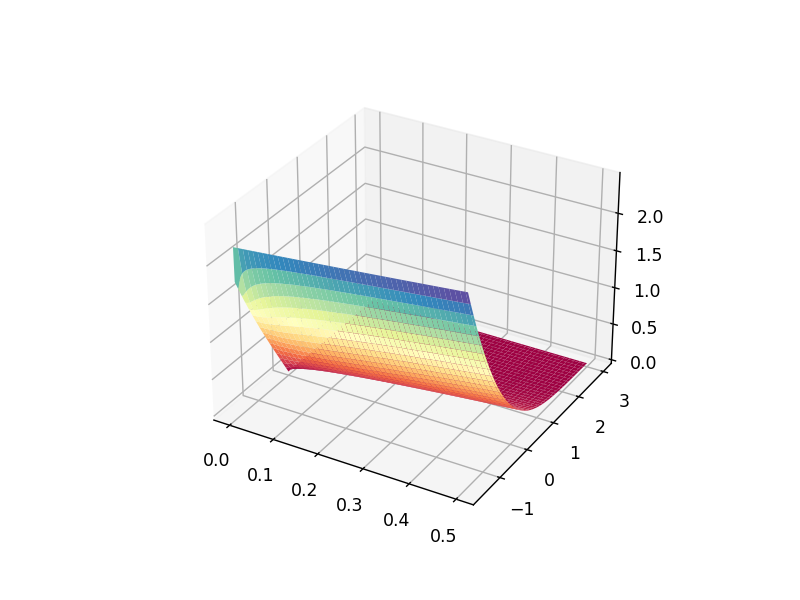

<IPython.core.display.Javascript object>


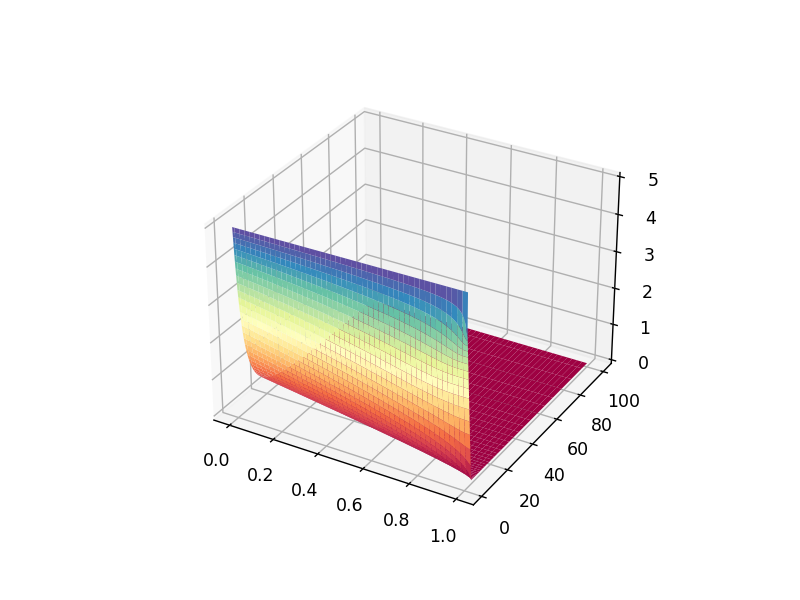

<IPython.core.display.Javascript object>


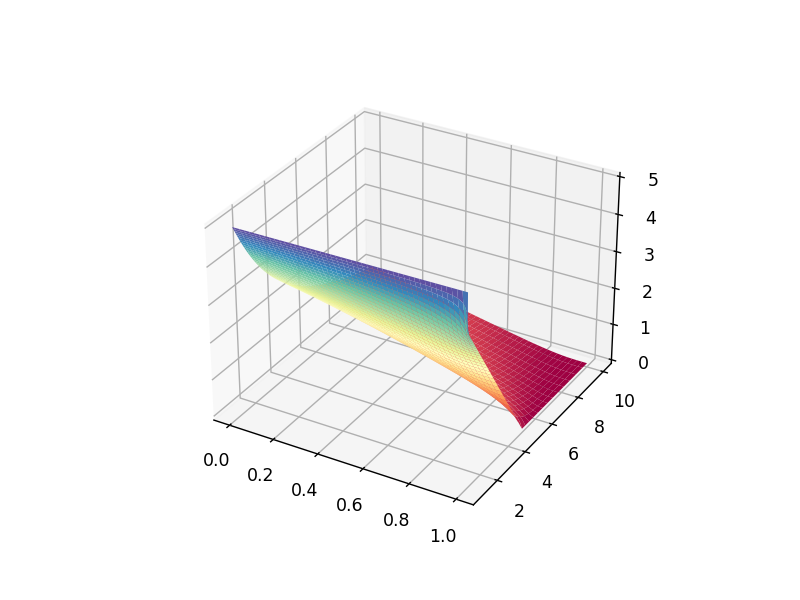

In [48]:
# Backward time central space (BTCS) scheme applied to the transformed 
# Black-Scholes equation for European options.

 #put back in for Jupyter notebook

# Step 1. Define parameters 

# Option parameters
E = 5.;                # Strike price
T = 1;                 # Expiration time
r = 0.01;               # Risk free rate
sigma = 1;            # Volatility
sLow = 1;    # Minimum value of S (very close to boundary condition at S=0)
sHigh = 100;    # Maximum value of S (very large, since second boundary 
                        # condition for V(S,t) is defined as S increases to infinity.)

# Transformed parameters
xLow = math.log(sLow/E);        # Transformed minimum state value
xHigh = math.log(sHigh/E);      # Transformed maximum state value
Tau = 0.5*(sigma**2)*(T);       # Transformed length of time interval
k = r/(0.5*sigma**2);
alphaT = -0.5*(k-1);
betaT = -0.25*(k+1)**2;

# Discretisation parameters
Nx = 500; dx = (xHigh-xLow)/float(Nx);
Nt = 500; dt = Tau/float(Nt); 
alpha = dt/(float(dx)**2);                # Note the distinction between alpha and alphaT
x=num.linspace(xLow,xHigh,Nx+1);
tau = num.linspace(0,Tau,Nt+1);
S = E*num.exp(x);
t = T-(2/sigma**2)*tau;

# Step 2. Set up iteration matrix G and invert
G = (1+2*alpha)*num.eye(Nx-1,Nx-1) - alpha*num.diag(num.ones(Nx-2),1) - alpha*num.diag(num.ones(Nx-2),-1);
Ginv=linalg.inv(G);

# Step 3. Set up matrix containing the interior solution values U(n*dx, m*dt)
U = num.zeros((Nx-1,Nt+1));

# Step 4. Define the initial profile and boundary conditions

# European call 
U[:,0] = num.maximum(num.exp(0.5*(k+1)*num.linspace(xLow+dx,xHigh-dx,Nx-1))-
                     num.exp(0.5*(k-1)*num.linspace(xLow+dx,xHigh-dx,Nx-1)),0);
a = 0*num.ones(Nt+1);
b = num.exp((1-alphaT)*xHigh-betaT*tau);

# European put (uncomment to overwrite i.c. and b.c. for European call)
U[:,0] = num.maximum(num.exp(0.5*(k-1)*num.linspace(xLow+dx,xHigh-dx,Nx-1))-
                     num.exp(0.5*(k+1)*num.linspace(xLow+dx,xHigh-dx,Nx-1)),0);
a = num.exp(-alphaT*xLow-(betaT+k)*tau);
b = 0*num.ones(Nt+1);


# Step 5. Set up the collection of vectors q containing the boundary conditions
# and populate the first and last row.  
q=num.zeros((Nx-1,Nt+1));
q[0,:]=alpha*a; 
q[Nx-2,:]=alpha*b;


# Step 6. Compute the interior solution values via the BTCS scheme.
for i in range(0,Nt):
    U[:,i+1] = Ginv.dot(U[:,i])+Ginv.dot(q[:,i+1]);

# Step 7. Append the boundary conditions to the solution matrix.
U=num.r_[[a],U,[b]]

# Step 8. Transform back to the Black-Scholes variables. 
V = num.zeros((Nx+1,Nt+1));

for i in range(0,Nx+1):
  for j in range(0,Nt+1):
    V[i,j]=E*num.exp(alphaT*x[i]+betaT*tau[j])*U[i,j];
 

# Step 9. Display U and V

# Direct solution of the diffusion equation

fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y=num.meshgrid(num.linspace(0,Tau,Nt+1),num.linspace(xLow,xHigh,Nx+1))

ax.plot_surface(X,Y,U,cmap='Spectral');
plt.show();

# Solution of the Black-Scholes equation after transformation is reversed

fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y=num.meshgrid(num.linspace(T,0,Nt+1),E*num.exp(num.linspace(xLow,xHigh,Nx+1)))

ax.plot_surface(X,Y,V,cmap='Spectral');
plt.show();

# Zoomed solution of the Black-Scholes equation for asset values on [0,100]

fig = plt.figure()
ax = plt.axes(projection='3d')

xr=math.ceil((math.log(10/E)-xLow)/float(dx));

X,Y=num.meshgrid(num.linspace(T,0,Nt+1),E*num.exp(num.linspace(xLow,xr*dx+xLow,xr+1)))

ax.plot_surface(X,Y,V[range(0,xr+1),:],cmap='Spectral');
plt.show();






In [49]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print("Shape of V[:xr+1, :]:", V[:xr+1, :].shape)

Shape of X: (251, 501)
Shape of Y: (251, 501)
Shape of V[:xr+1, :]: (251, 501)


## Part 3 Crank Nicolson


<IPython.core.display.Javascript object>


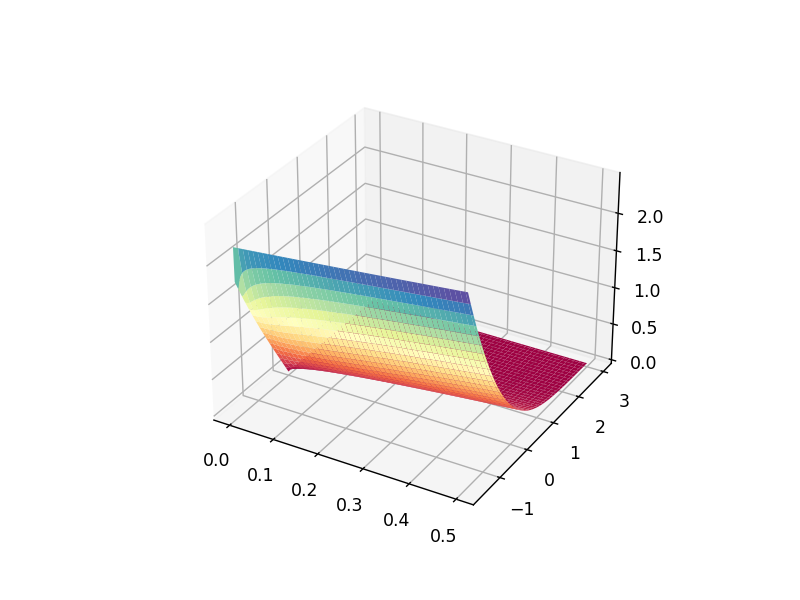

<IPython.core.display.Javascript object>


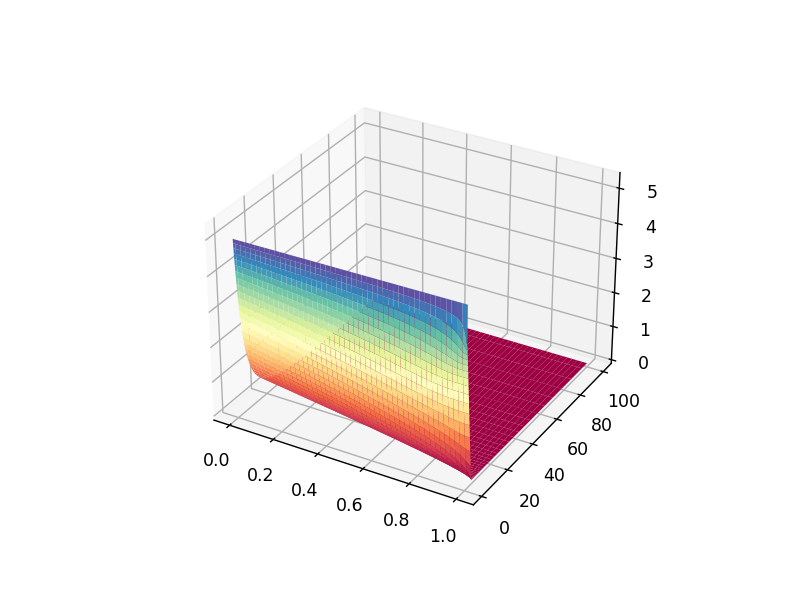

<IPython.core.display.Javascript object>


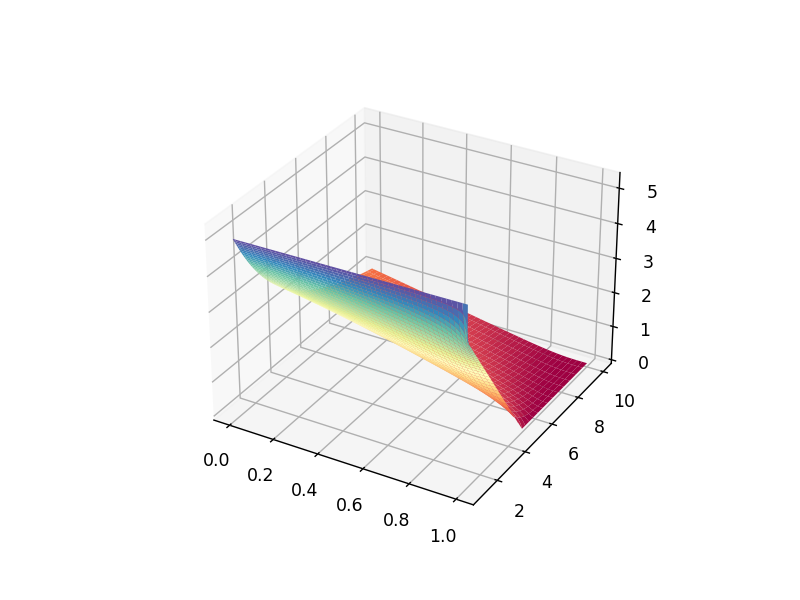

In [51]:
# Backward time central space (BTCS) scheme applied to the transformed 
# Black-Scholes equation for European options.

 #put back in for Jupyter notebook

# Step 1. Define parameters 

# Option parameters
E = 5.;                # Strike price
T = 1;                 # Expiration time
r = 0.01;               # Risk free rate
sigma = 1;            # Volatility
sLow = 1;    # Minimum value of S (very close to boundary condition at S=0) (Stock price never 0)
sHigh = 100;    # Maximum value of S (very large, since second boundary 
                        # condition for V(S,t) is defined as S increases to infinity.)

# Transformed parameters
xLow = math.log(sLow/E);        # Transformed minimum state value
xHigh = math.log(sHigh/E);      # Transformed maximum state value
Tau = 0.5*(sigma**2)*(T);       # Transformed length of time interval
k = r/(0.5*sigma**2);
alphaT = -0.5*(k-1);
betaT = -0.25*(k+1)**2;

# Discretisation parameters
Nx = 500; dx = (xHigh-xLow)/float(Nx);
Nt = 500; dt = Tau/float(Nt); 
alpha = dt/(float(dx)**2);                # Note the distinction between alpha and alphaT
x=num.linspace(xLow,xHigh,Nx+1);
tau = num.linspace(0,Tau,Nt+1);
S = E*num.exp(x);
t = T-(2/sigma**2)*tau;

# Step 2. Set up iteration matrix G and invert
G = (1+alpha)*num.eye(Nx-1,Nx-1) - (1/2)*alpha*num.diag(num.ones(Nx-2),1) - (1/2)*alpha*num.diag(num.ones(Nx-2),-1);
Ginv=linalg.inv(G);

F = (1-alpha)*num.eye(Nx-1,Nx-1) + (1/2)*alpha*num.diag(num.ones(Nx-2),1) + (1/2)*alpha*num.diag(num.ones(Nx-2),-1);
# Step 3. Set up matrix containing the interior solution values U(n*dx, m*dt)
U = num.zeros((Nx-1,Nt+1));

# Step 4. Define the initial profile and boundary conditions

# European call 
U[:,0] = num.maximum(num.exp(0.5*(k+1)*num.linspace(xLow+dx,xHigh-dx,Nx-1))-
                     num.exp(0.5*(k-1)*num.linspace(xLow+dx,xHigh-dx,Nx-1)),0);
a = 0*num.ones(Nt+1);
b = num.exp((1-alphaT)*xHigh-betaT*tau);

# European put (uncomment to overwrite i.c. and b.c. for European call)
U[:,0] = num.maximum(num.exp(0.5*(k-1)*num.linspace(xLow+dx,xHigh-dx,Nx-1))-
                     num.exp(0.5*(k+1)*num.linspace(xLow+dx,xHigh-dx,Nx-1)),0);
a = num.exp(-alphaT*xLow-(betaT+k)*tau);
b = 0*num.ones(Nt+1);


# Step 5. Set up the collection of vectors q containing the boundary conditions
# and populate the first and last row.  
q = num.zeros((Nx-1, Nt+1))

# For all time steps from n = 1 to Nt
q[0, 1:] = (alpha/2) * (a[1:] + a[:-1])  # Boundary at x = x_0
q[Nx-2, 1:] = (alpha/2) * (b[1:] + b[:-1])  # Boundary at x = x_N



# Step 6. Compute the interior solution values via the Crank Nicolson scheme.
for i in range(0,Nt):
    U[:,i+1] = Ginv.dot(F.dot(U[:,i]))+Ginv.dot(q[:,i+1]);

# Step 7. Append the boundary conditions to the solution matrix.
U=num.r_[[a],U,[b]]

# Step 8. Transform back to the Black-Scholes variables. 
V = num.zeros((Nx+1,Nt+1));

for i in range(0,Nx+1):
  for j in range(0,Nt+1):
    V[i,j]=E*num.exp(alphaT*x[i]+betaT*tau[j])*U[i,j];
 

# Step 9. Display U and V

# Direct solution of the diffusion equation

fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y=num.meshgrid(num.linspace(0,Tau,Nt+1),num.linspace(xLow,xHigh,Nx+1))

ax.plot_surface(X,Y,U,cmap='Spectral');
plt.show();

# Solution of the Black-Scholes equation after transformation is reversed

fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y=num.meshgrid(num.linspace(T,0,Nt+1),E*num.exp(num.linspace(xLow,xHigh,Nx+1)))

ax.plot_surface(X,Y,V,cmap='Spectral');
plt.show();

# Zoomed solution of the Black-Scholes equation for asset values on [0,100]

fig = plt.figure()
ax = plt.axes(projection='3d')

xr=math.ceil((math.log(10/E)-xLow)/float(dx));

X,Y=num.meshgrid(num.linspace(T,0,Nt+1),E*num.exp(num.linspace(xLow,xr*dx+xLow,xr+1)))

ax.plot_surface(X,Y,V[range(0,xr+1),:],cmap='Spectral');
plt.show();





In [52]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print("Shape of V[:xr+1, :]:", V[:xr+1, :].shape)

Shape of X: (251, 501)
Shape of Y: (251, 501)
Shape of V[:xr+1, :]: (251, 501)
